In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff, feature_extraction

appended
appended
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


In [3]:
# Reading filtered from disk
from numpy import genfromtxt
filtered_path = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/'

num_csvs = len([f for f in os.listdir(filtered_path) 
     if f.endswith('.csv') and os.path.isfile(os.path.join(filtered_path, f)) and f[0]=='i'])

eemds = []
filtered_freqs = []
columns = []

for i in range(num_csvs):
    vals = genfromtxt(filtered_path+'interval_number_'+str(i)+'.csv', delimiter=',')
    print(vals)
    # df=pd.read_csv(filtered_path+'interval_number_'+str(i)+'.csv')
    eemds.append(vals)
    if i == 5:
        break

[[ 3.07617138e-03  4.99956963e-01 -5.32890518e-01 ...  2.58160229e-01
  -2.47644378e-01  1.49803261e-01]
 [-2.50424624e-02 -3.28483931e-02  4.03481169e-02 ... -6.85989585e-03
  -4.06814296e-02 -3.13722288e-02]
 [-1.16691569e-01 -1.28684077e-01 -1.46054834e-01 ... -6.49245062e-02
  -9.58849394e-02 -1.11967273e-01]
 ...
 [-9.98238480e-04 -9.99452657e-04 -1.00066860e-03 ... -3.24535683e-03
  -3.24498690e-03 -3.24461648e-03]
 [ 2.19553950e-04  2.20056741e-04  2.20559090e-04 ...  3.40908714e-03
   3.40886514e-03  3.40864250e-03]
 [-3.30672282e-04 -3.30705485e-04 -3.30738611e-04 ... -3.61256216e-04
  -3.61269409e-04 -3.61282567e-04]]
[[-6.04686948e-01 -1.94530953e+00  2.12874322e+00 ...  2.23641181e+00
  -6.25410215e-01 -2.33004336e+00]
 [ 4.13622172e-01  5.56233614e-01 -1.35686644e-01 ... -3.60080765e-01
  -3.07537629e-01 -7.58111166e-02]
 [ 6.01173554e-02  4.01600160e-02 -1.01907157e-01 ...  6.35743940e-01
   8.33895438e-01  8.91093262e-01]
 ...
 [-4.45148758e-04 -4.46281743e-04 -4.4741056

In [24]:
np.corrcoef([eemds[0][0],eemds[0][0]])

array([[1., 1.],
       [1., 1.]])

In [15]:
corr_df = correlation_coeff.get_corr_coef(eemds[0])
corr_df

,Signal,Correlation coefficient
0,Raw signal,1.000000
1,IMF1,-0.030579
2,IMF2,-0.078614
3,IMF3,-0.073864
4,IMF4,-0.014425
5,IMF5,-0.004715
6,IMF6,-0.003863
7,IMF7,-0.004597
8,IMF8,-0.003527
9,IMF9,-0.001364


In [25]:
_, times, op_data_intervals, _ = load_raw_signals.load_raw('gearbox','wt04')

File exist


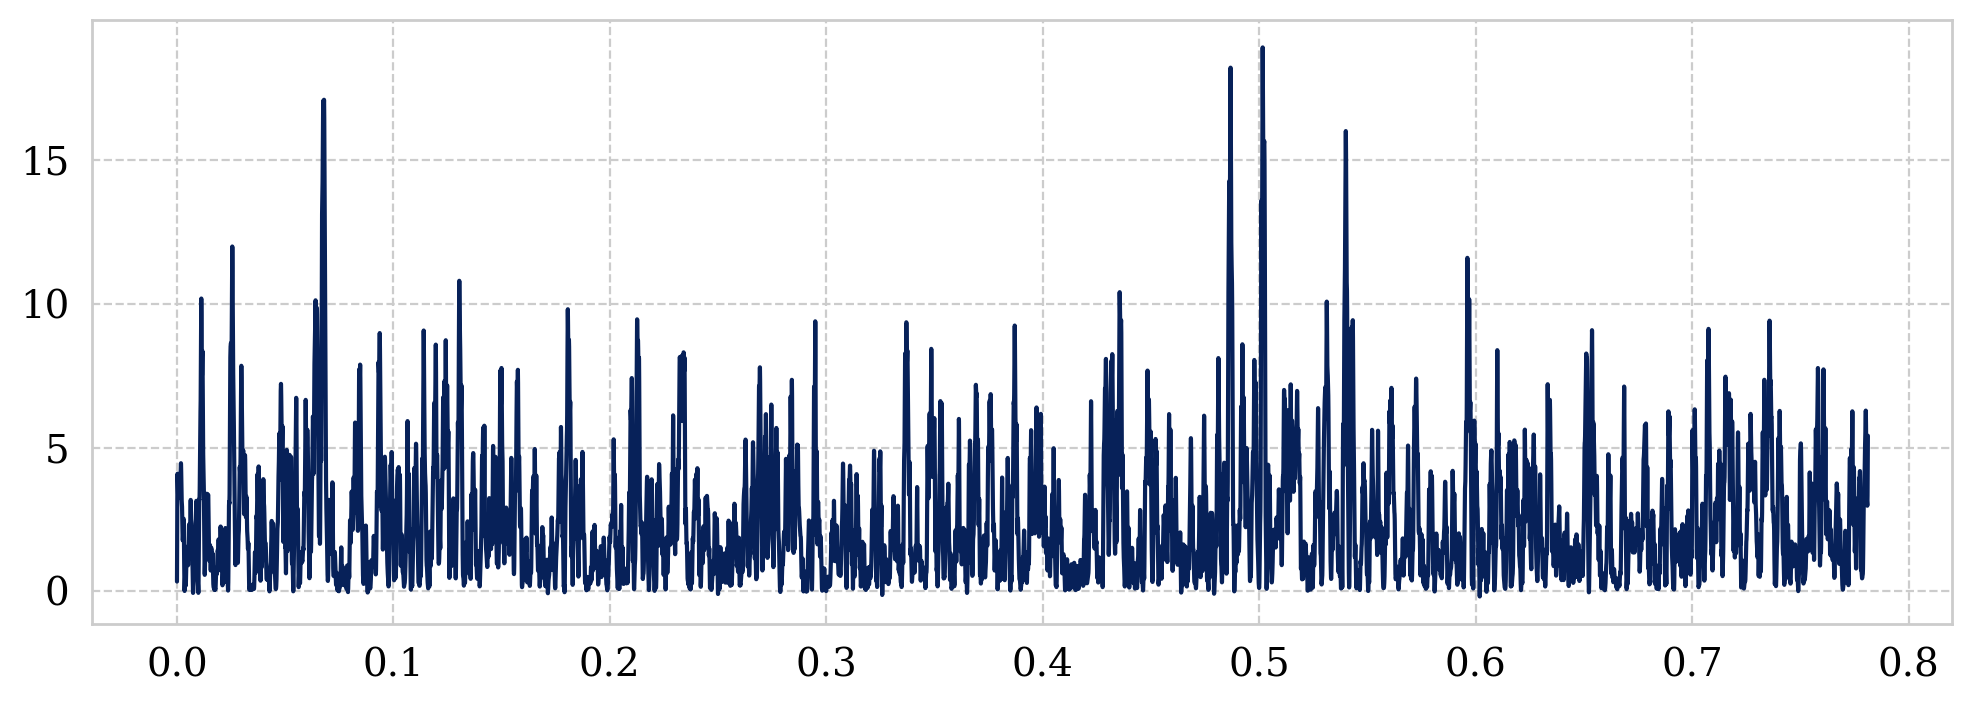

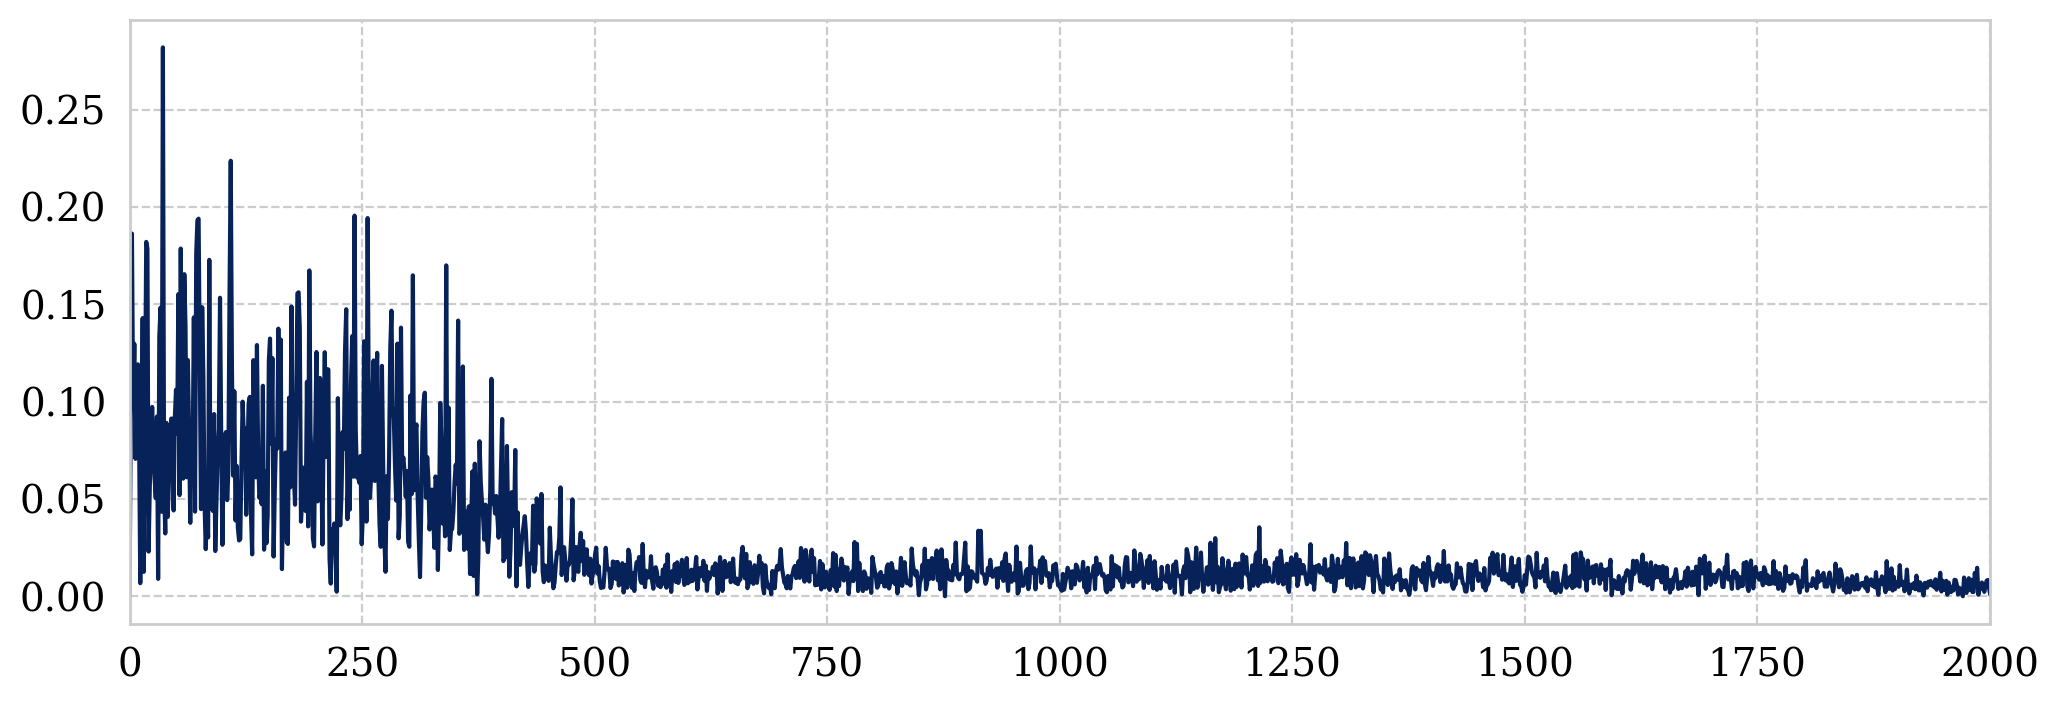

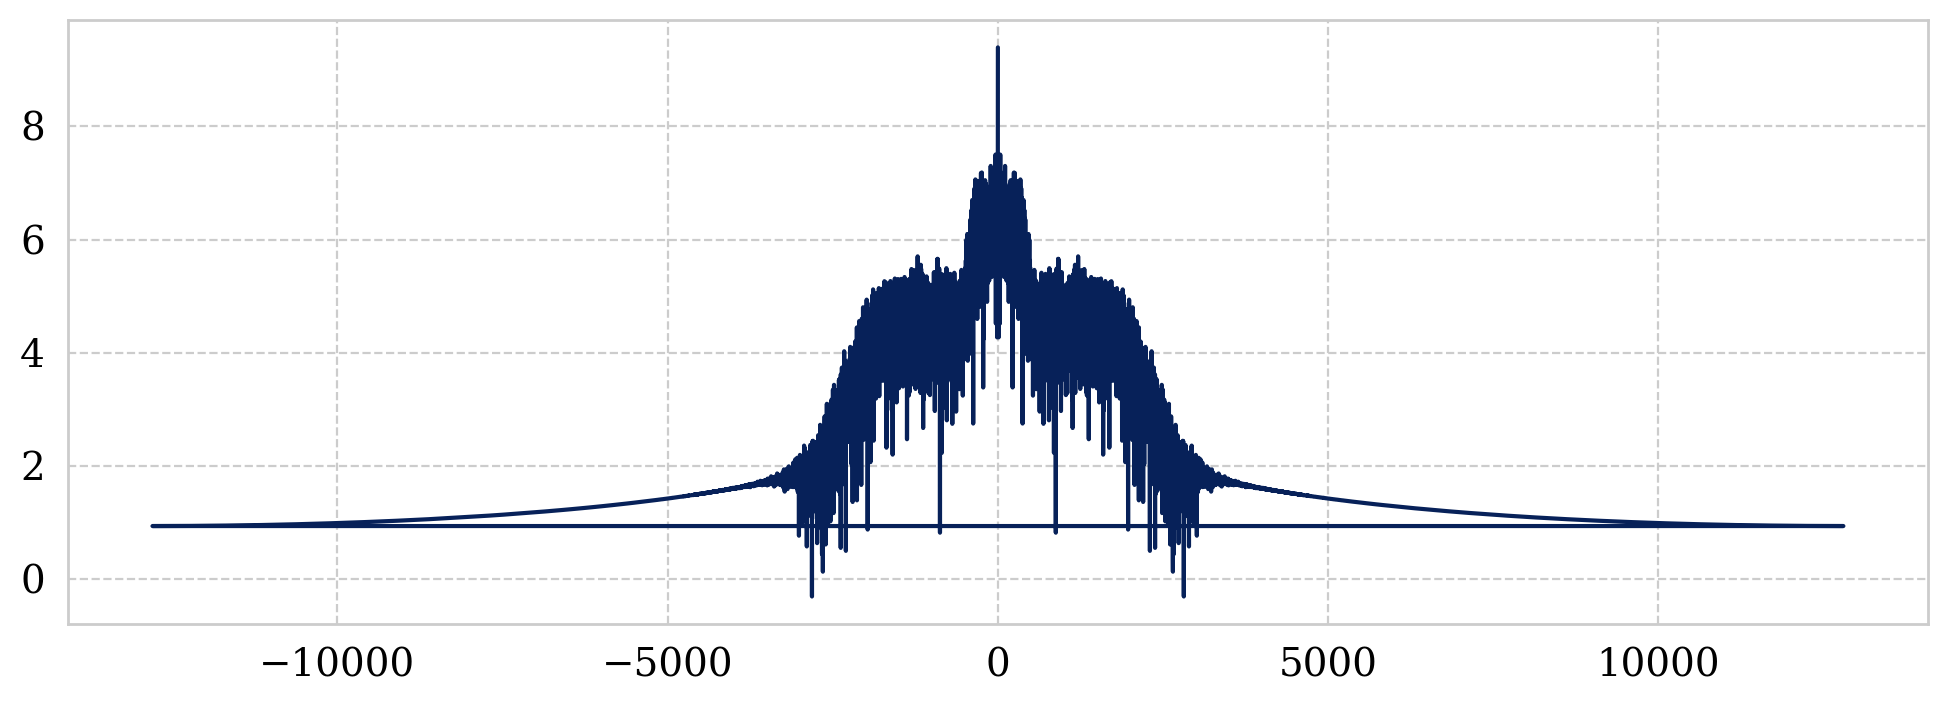

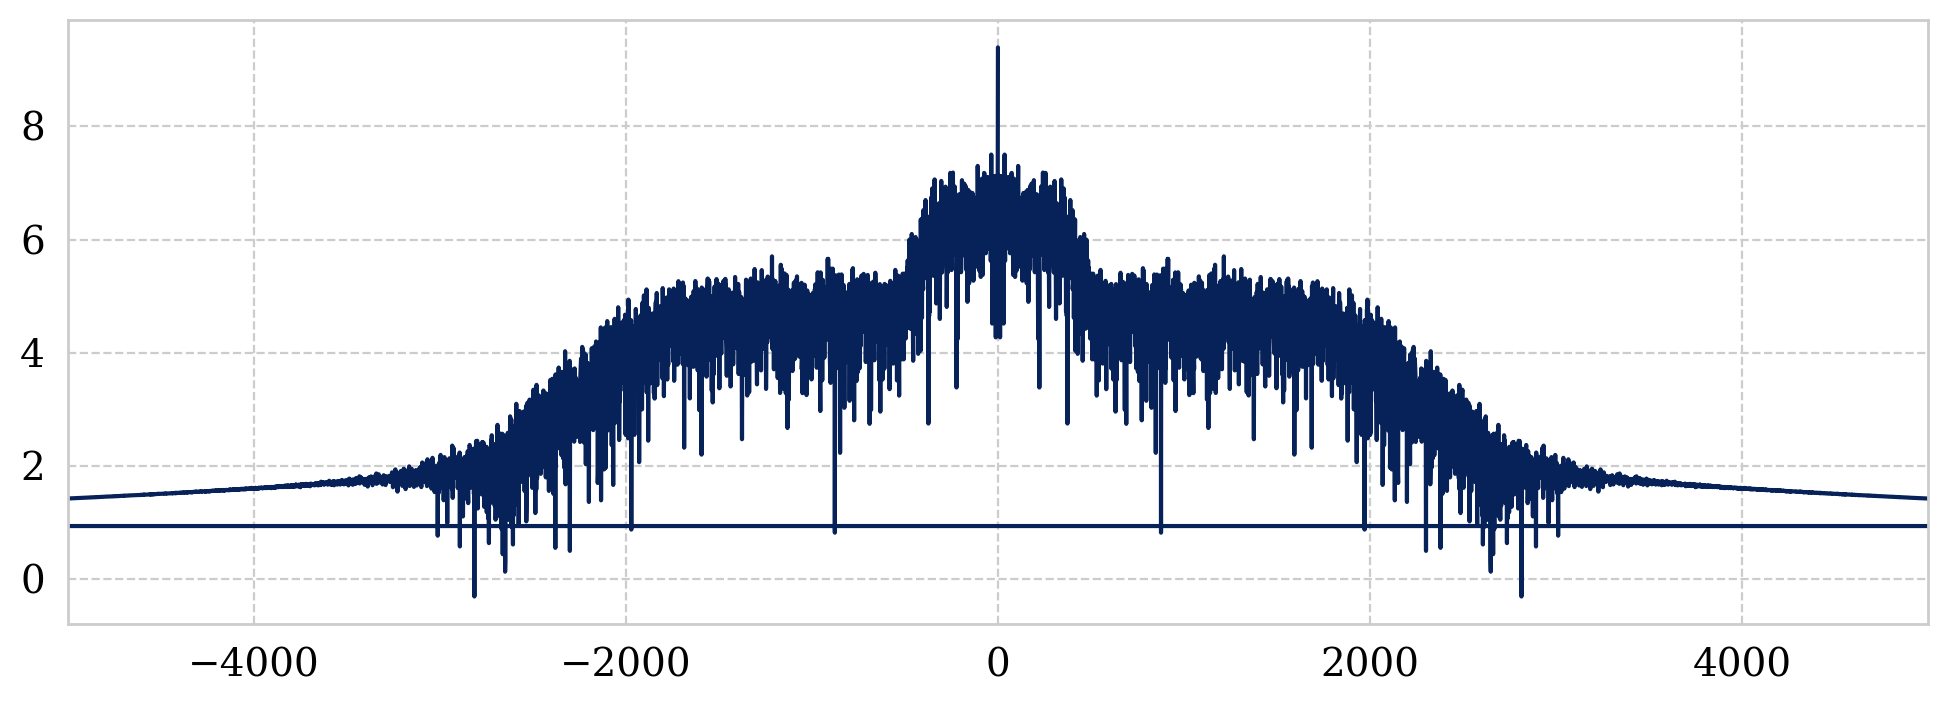

In [125]:
j = 1
# Rectify:
selected_IMF_index = 0
fs,_,_,_ =  envelope.get_sampling_freq(eemds[j][selected_IMF_index],times[j][0:20000])

# Rectify:
rectified = abs(eemds[j][selected_IMF_index])**2

higcut_lp = 2000
#Lowpass:
bandpass_filtered_rect_lp = filters.butter_lp_filter(rectified, higcut_lp, fs, order=5)


# Signal
plt.plot(times[j][0:20000],bandpass_filtered_rect_lp)
plt.show()
# FFT
final_signal = envelope.perform_fft(bandpass_filtered_rect_lp,times[j][0:20000],plot=True)
plt.plot(final_signal['freq'],final_signal['fft_norm'])
plt.xlim(0,2000)
plt.show()


sp = np.fft.fft(bandpass_filtered_rect_lp)
plt.plot(freq, np.log10(np.abs(sp) ** 2))
plt.show()


plt.plot(freq, np.log10(np.abs(sp) ** 2))
plt.xlim(-5000,5000)
plt.show()

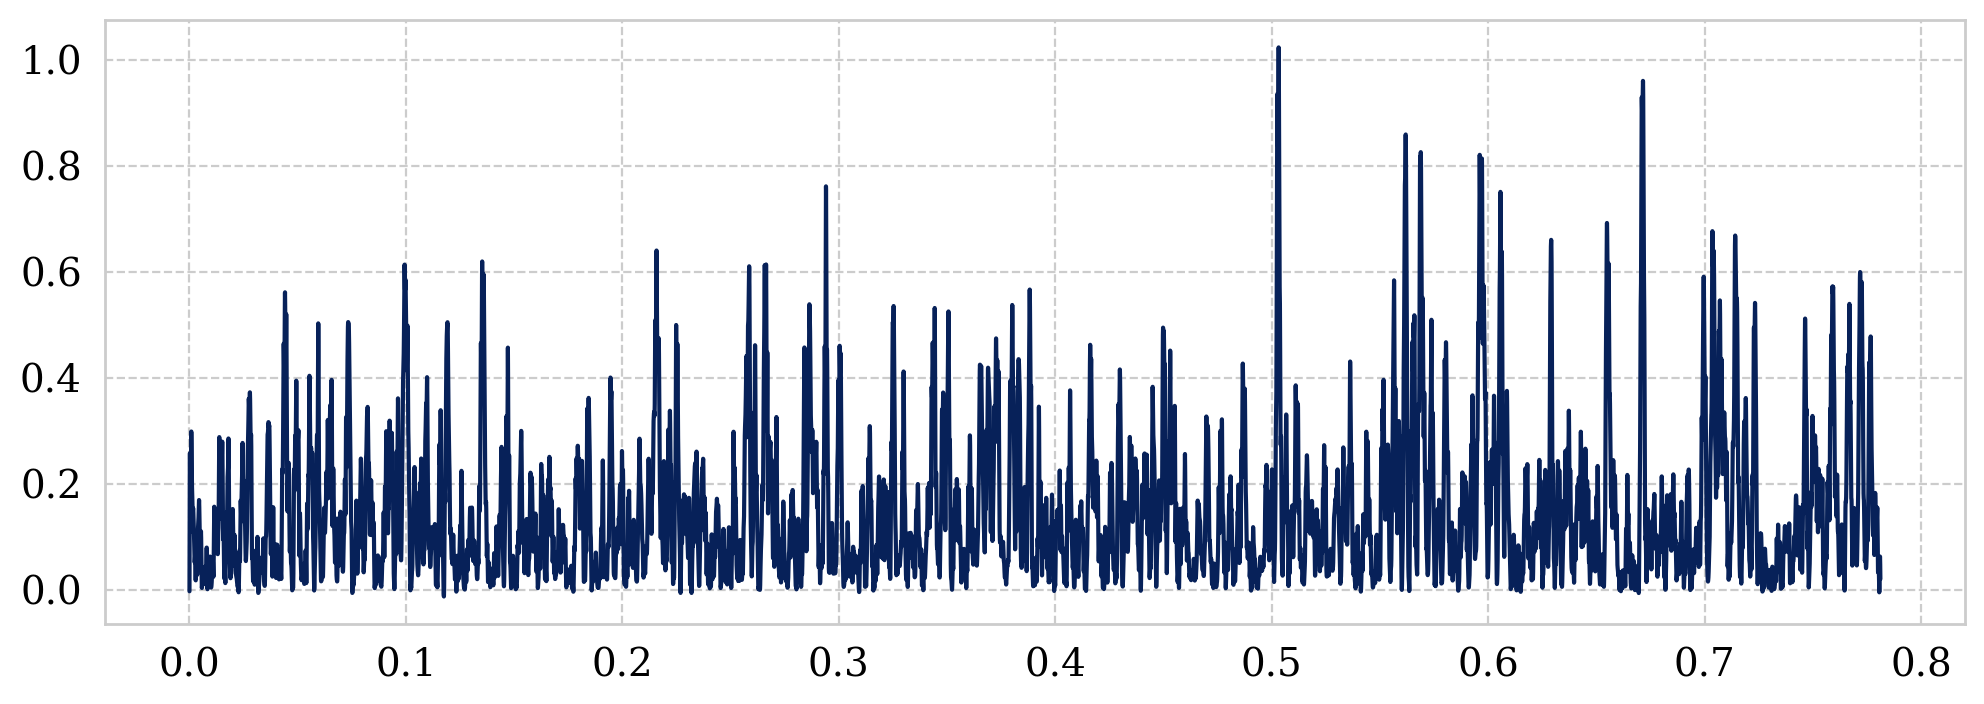

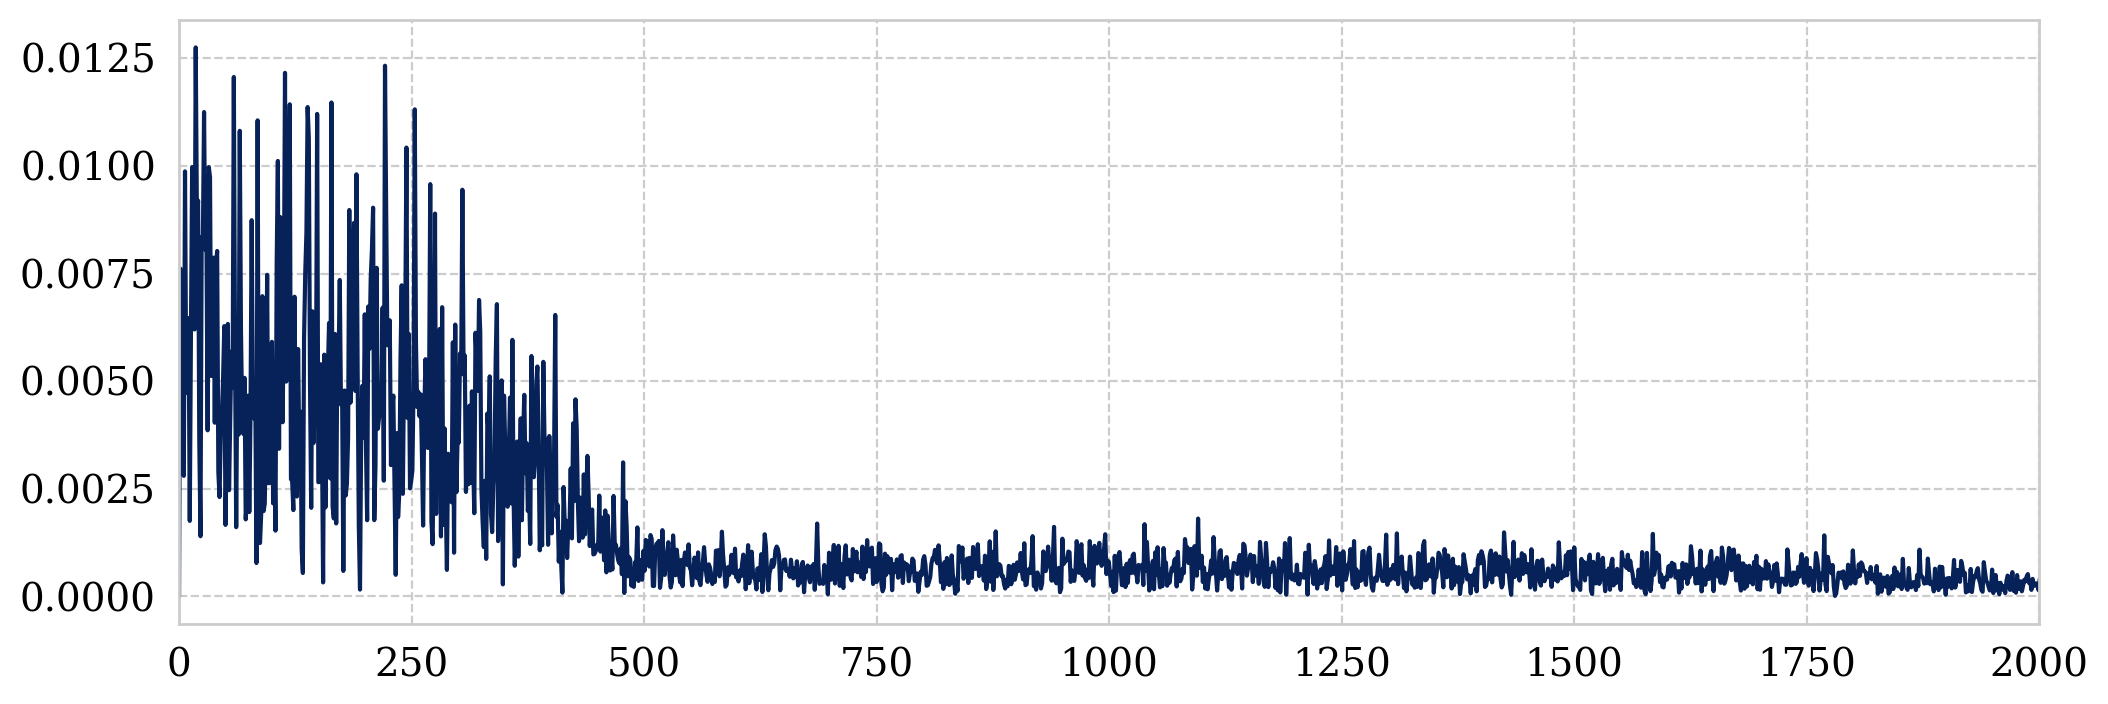

## Kanskje fjerne de som er under 1400? Som gjøres i den andre notebooken
# Frequency domain

In [118]:
bandpass_filtered_rect_lp.shape[-1]
timestep=times[j][0]-times[j][1]
freq = np.fft.fftfreq(bandpass_filtered_rect_lp.shape[-1],d=timestep) # time sloth of histogram is 1 hour

In [109]:
len(final_signal['freq'])

10000

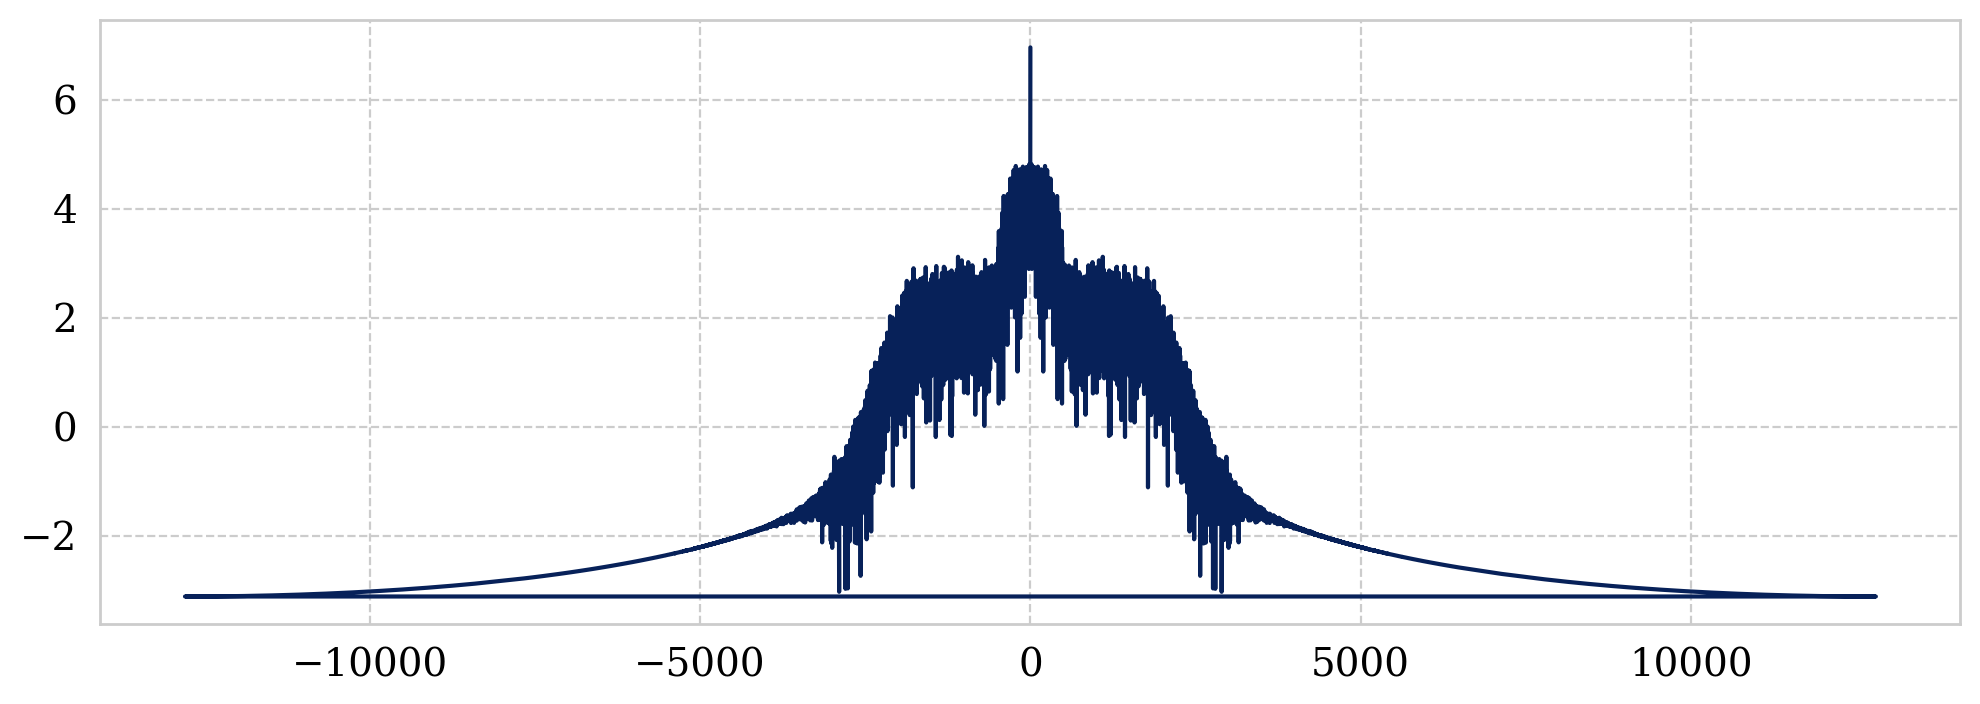

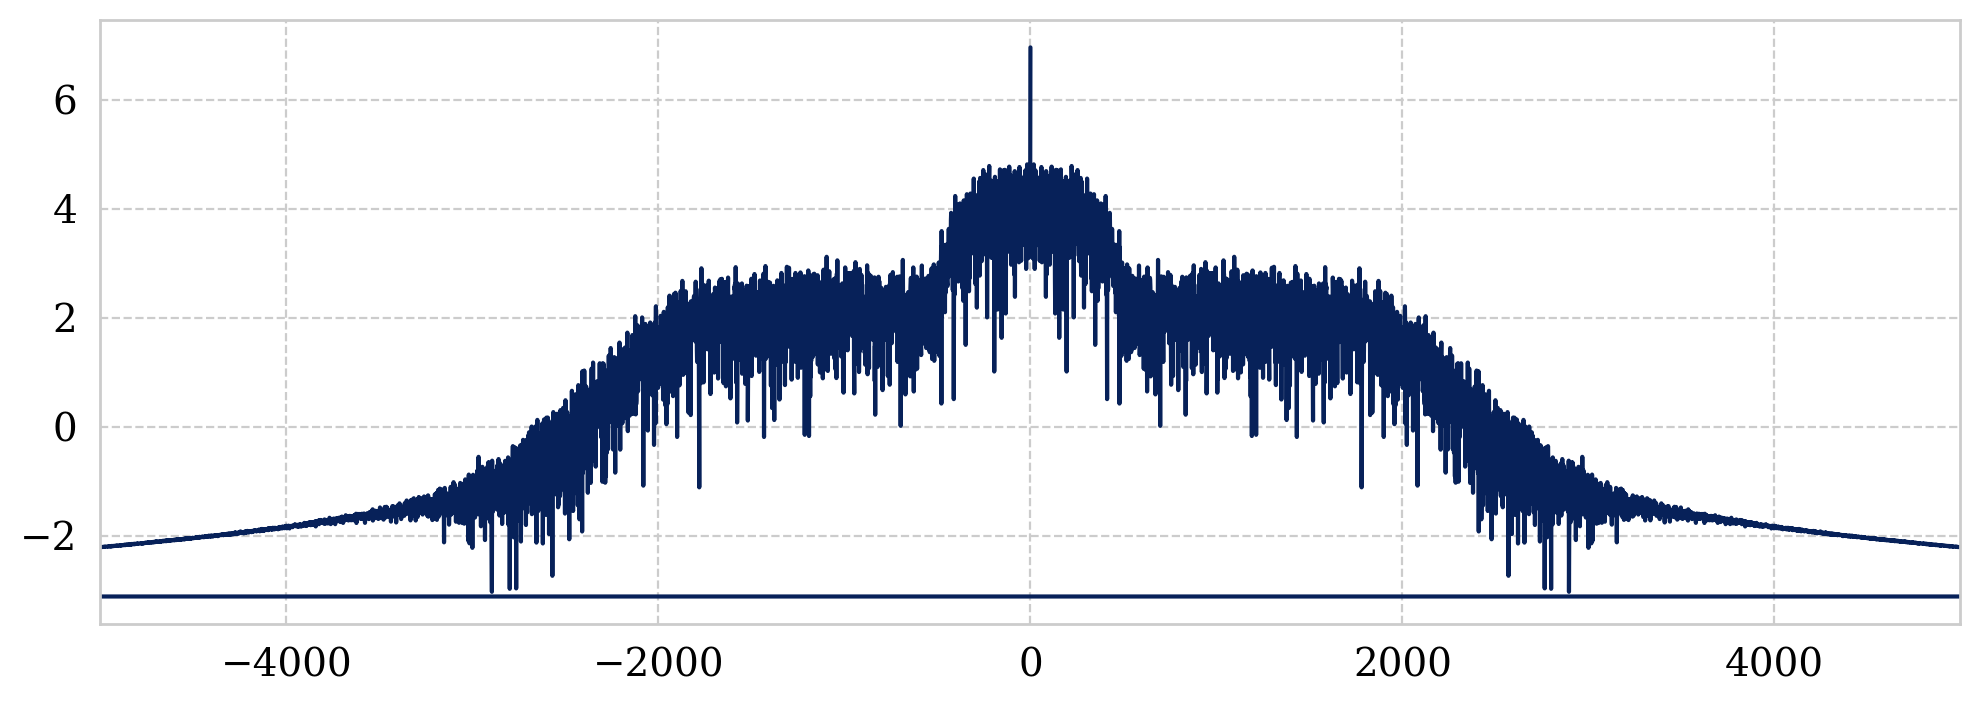

20000


ValueError: x and y must have same first dimension, but have shapes (10000,) and (20000,)

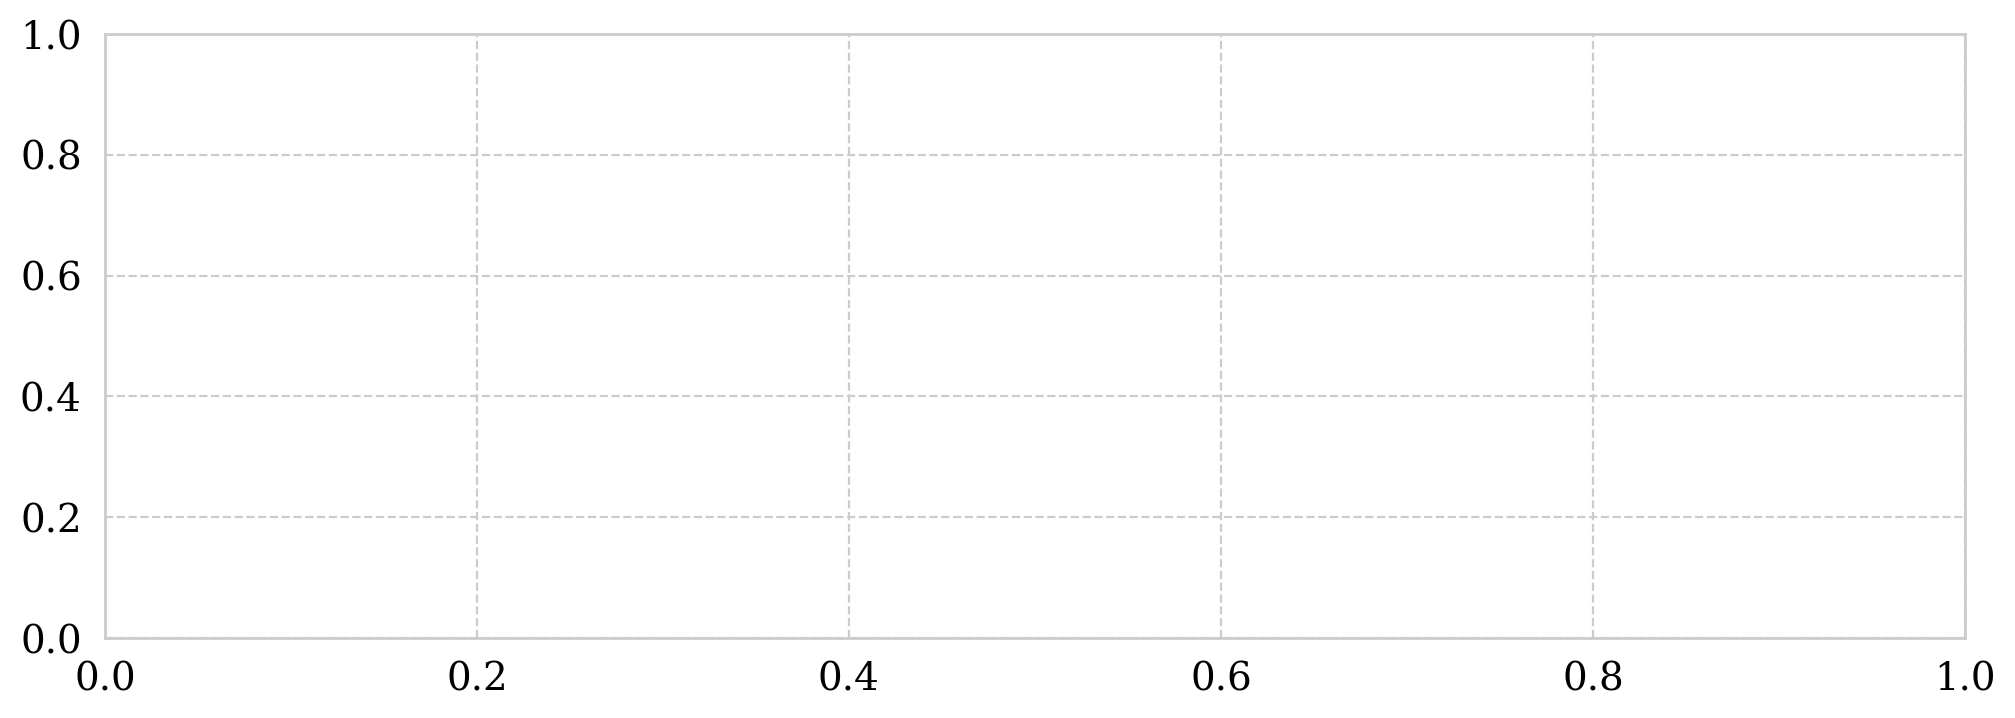

In [107]:
import numpy as np
import matplotlib.pyplot as plt
timestep=times[j][0]-times[j][1]
freq = np.fft.fftfreq(bandpass_filtered_rect_lp.shape[-1],d=timestep) # time sloth of histogram is 1 hour
sp = np.fft.fft(bandpass_filtered_rect_lp)
print(len(freq))
plt.plot(freq, np.log10(np.abs(sp) ** 2))
plt.show()

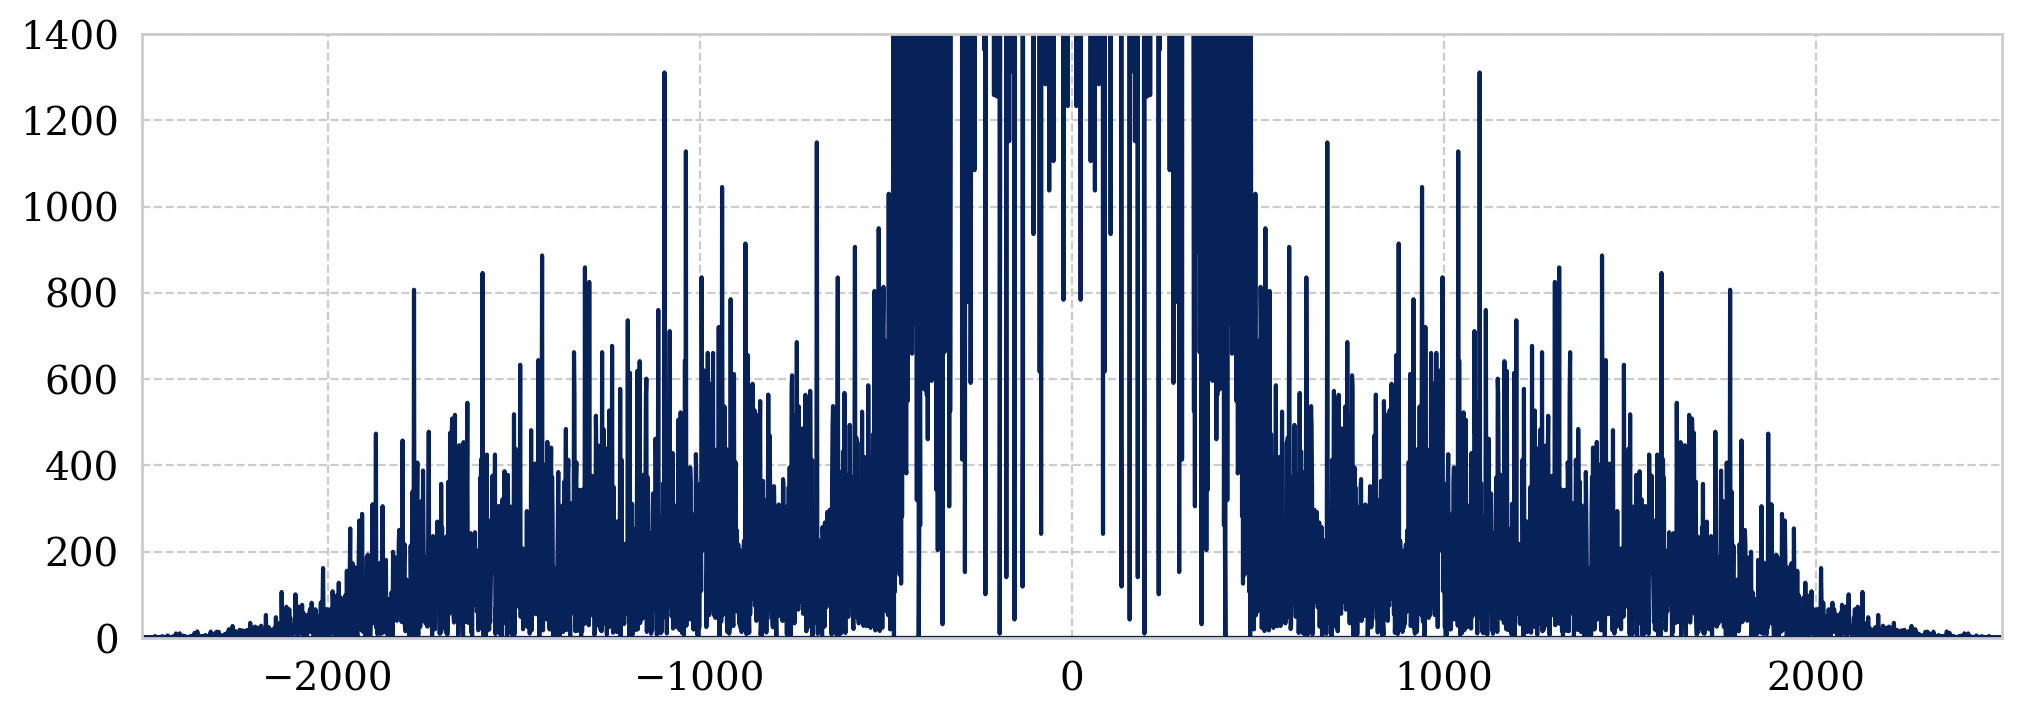

In [106]:
plt.plot(freq, np.abs(sp) ** 2)
plt.ylim(0,1400)
plt.xlim(-2500,2500)
plt.show()